# Organizing multiple subplots

In [17]:
%%capture
%load_ext autoreload
%autoreload 2
from antarctic_plots import fetch, utils, maps, regions, profile
import pygmt

define a region to plot

In [18]:
plot_region = regions.ross_ice_shelf

create a dictionary of grids names

In [19]:
%%capture 

layers = {
    'ice thickness': {
        'grid': fetch.bedmachine(region=plot_region, layer='thickness'),}
    , 
    'GHF':{
        'grid': fetch.ghf(region=plot_region, version='burton-johnson-2020')}
    , 
    'GIA':{
        'grid': fetch.gia(region=plot_region, version='stal-2020')}
    , 
    'FA grav':{
        'grid': fetch.gravity(region=plot_region, version='antgg-update', anomaly_type='FA')}
    , 
    'BA grav':{
        'grid': fetch.gravity(region=plot_region, version='antgg-update', anomaly_type='BA')}
    , 
    'basement':{
        'grid': fetch.basement(region=plot_region)}
    ,
}

## Plot the grids
By default, `maps.subplots` will try to create a square of subplots from the supplied dictionary. You can also set parameter `dims=(number of rows, number of columns)` to customize this. 

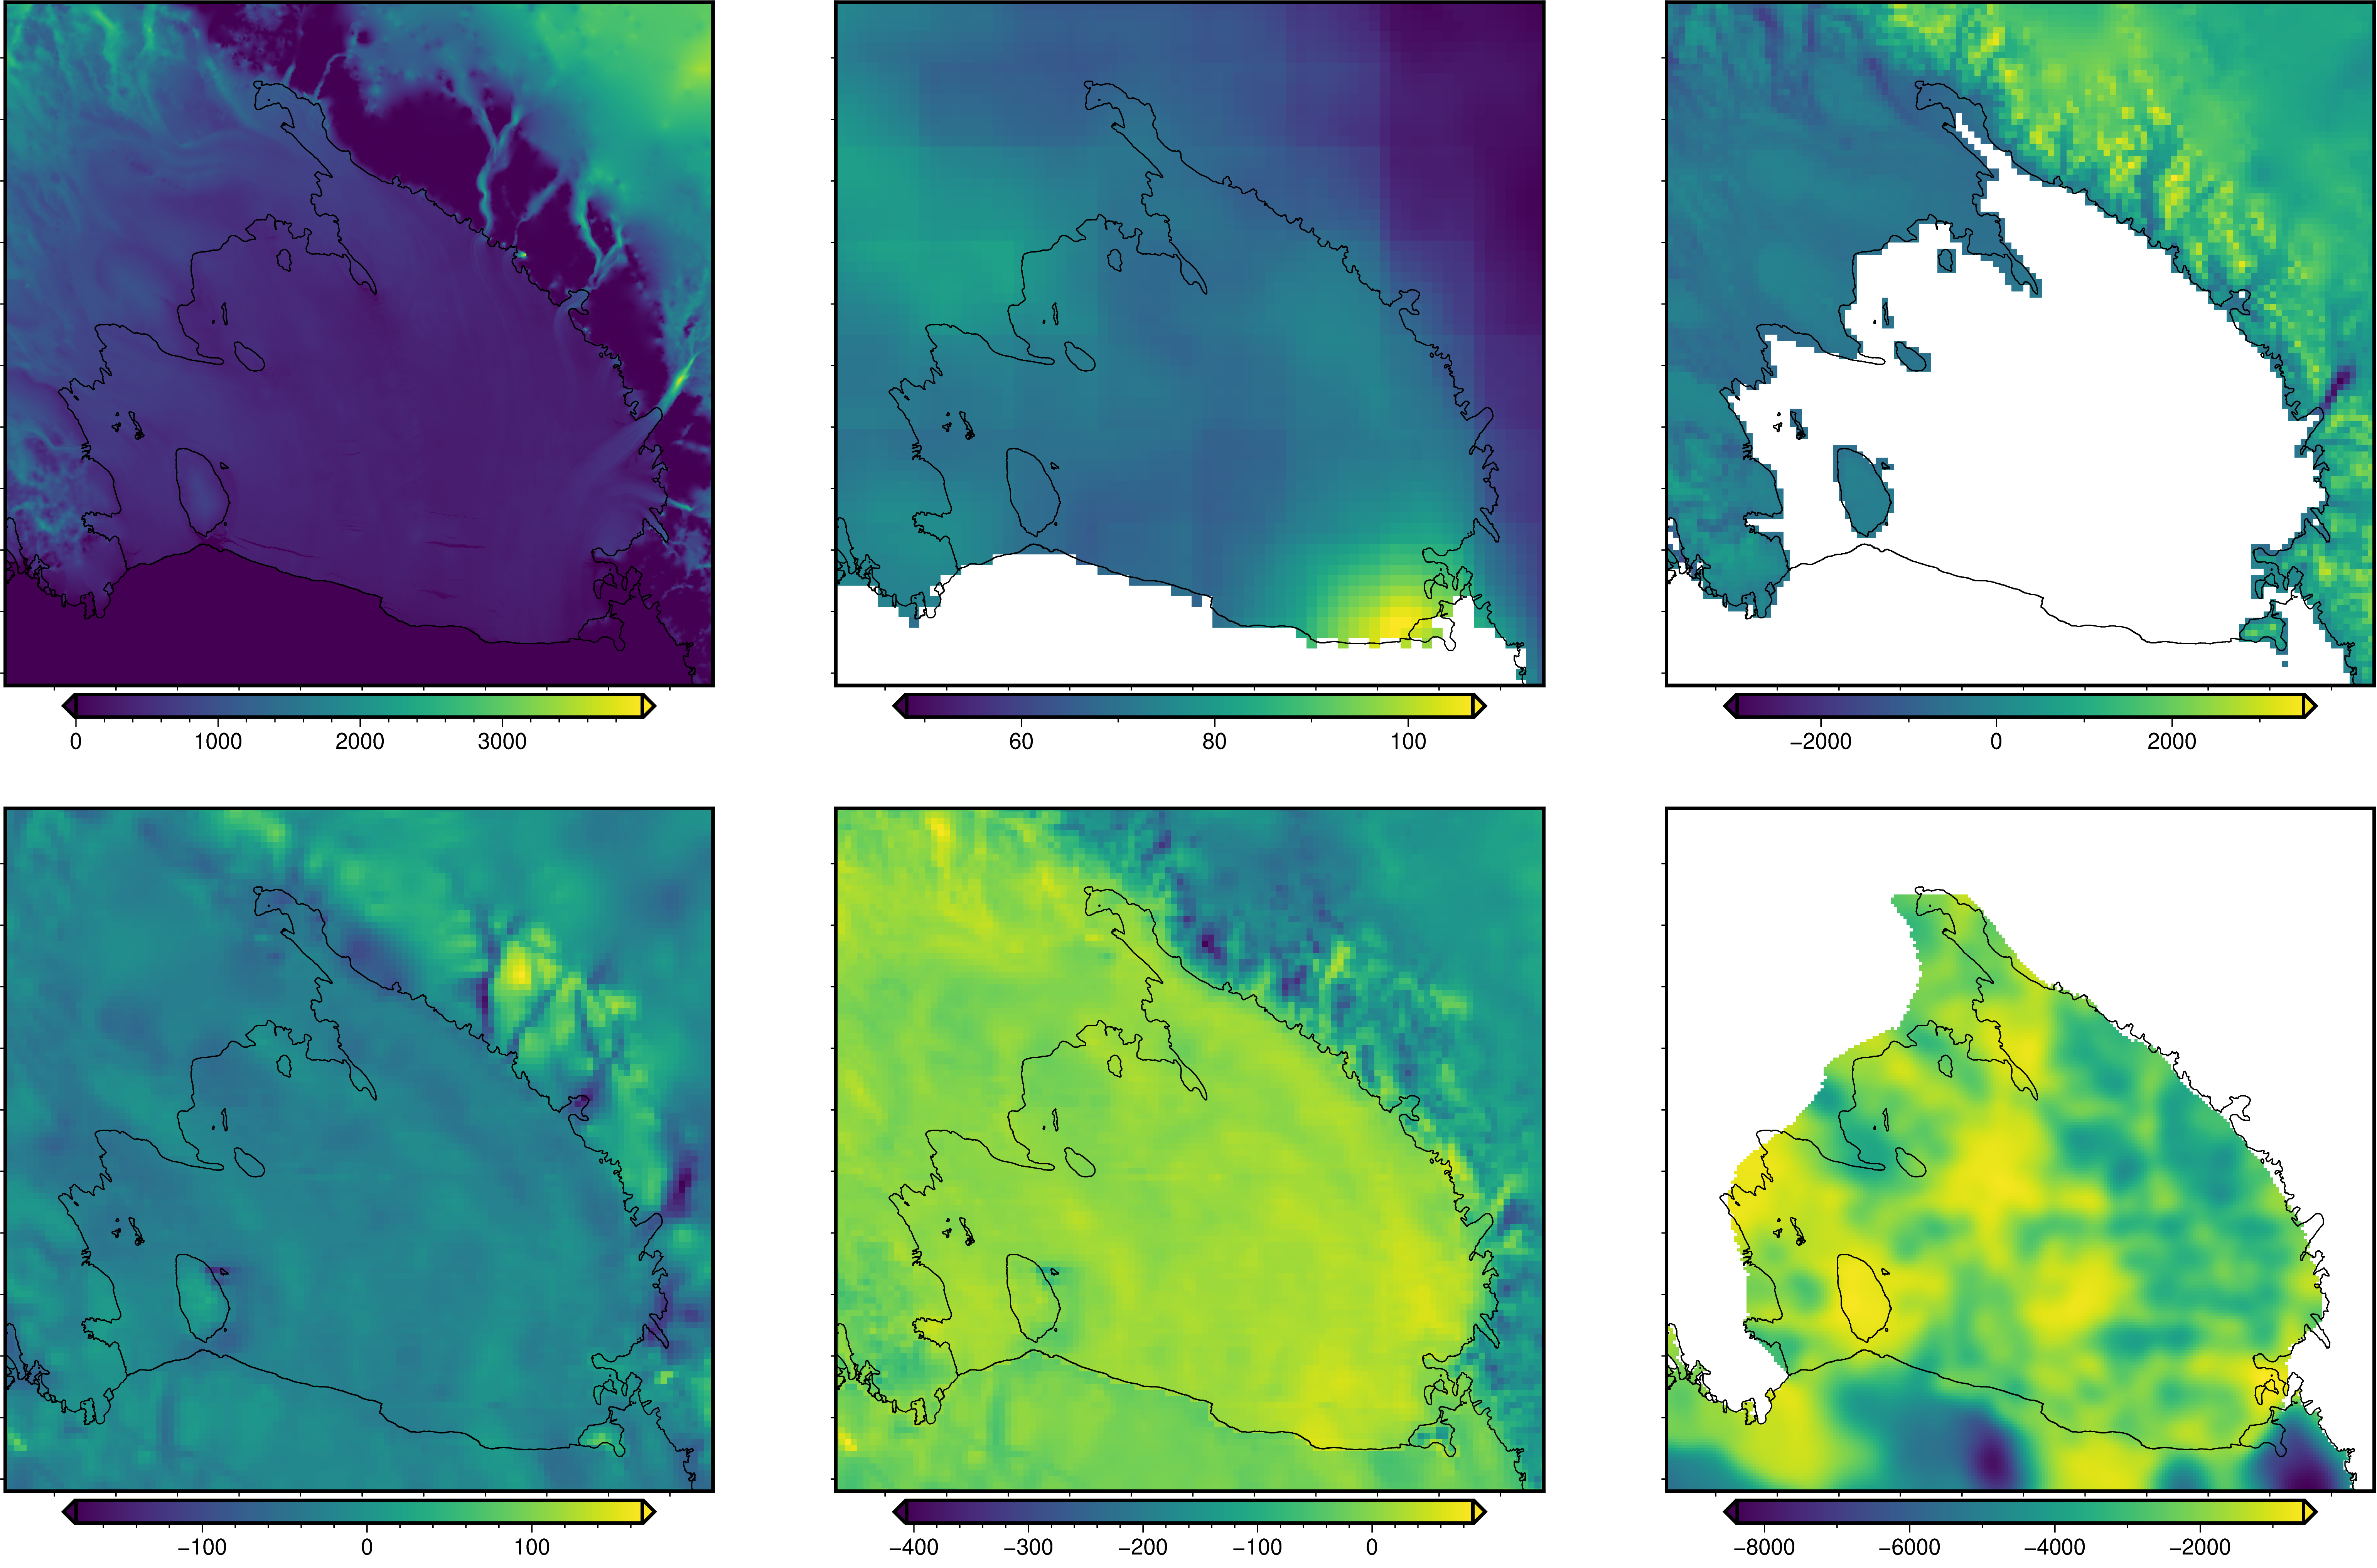

In [20]:
fig = maps.subplots(
    layers, 
    plot_region,
    margins='1c',
    coast=True,
    )
fig.show()

If you want to further customize the plots, it might be better to use the built-in PyGMT subplot function, and set `origin_shift='no_shift'`.

Here we add titles, a shapefile, and a legend.

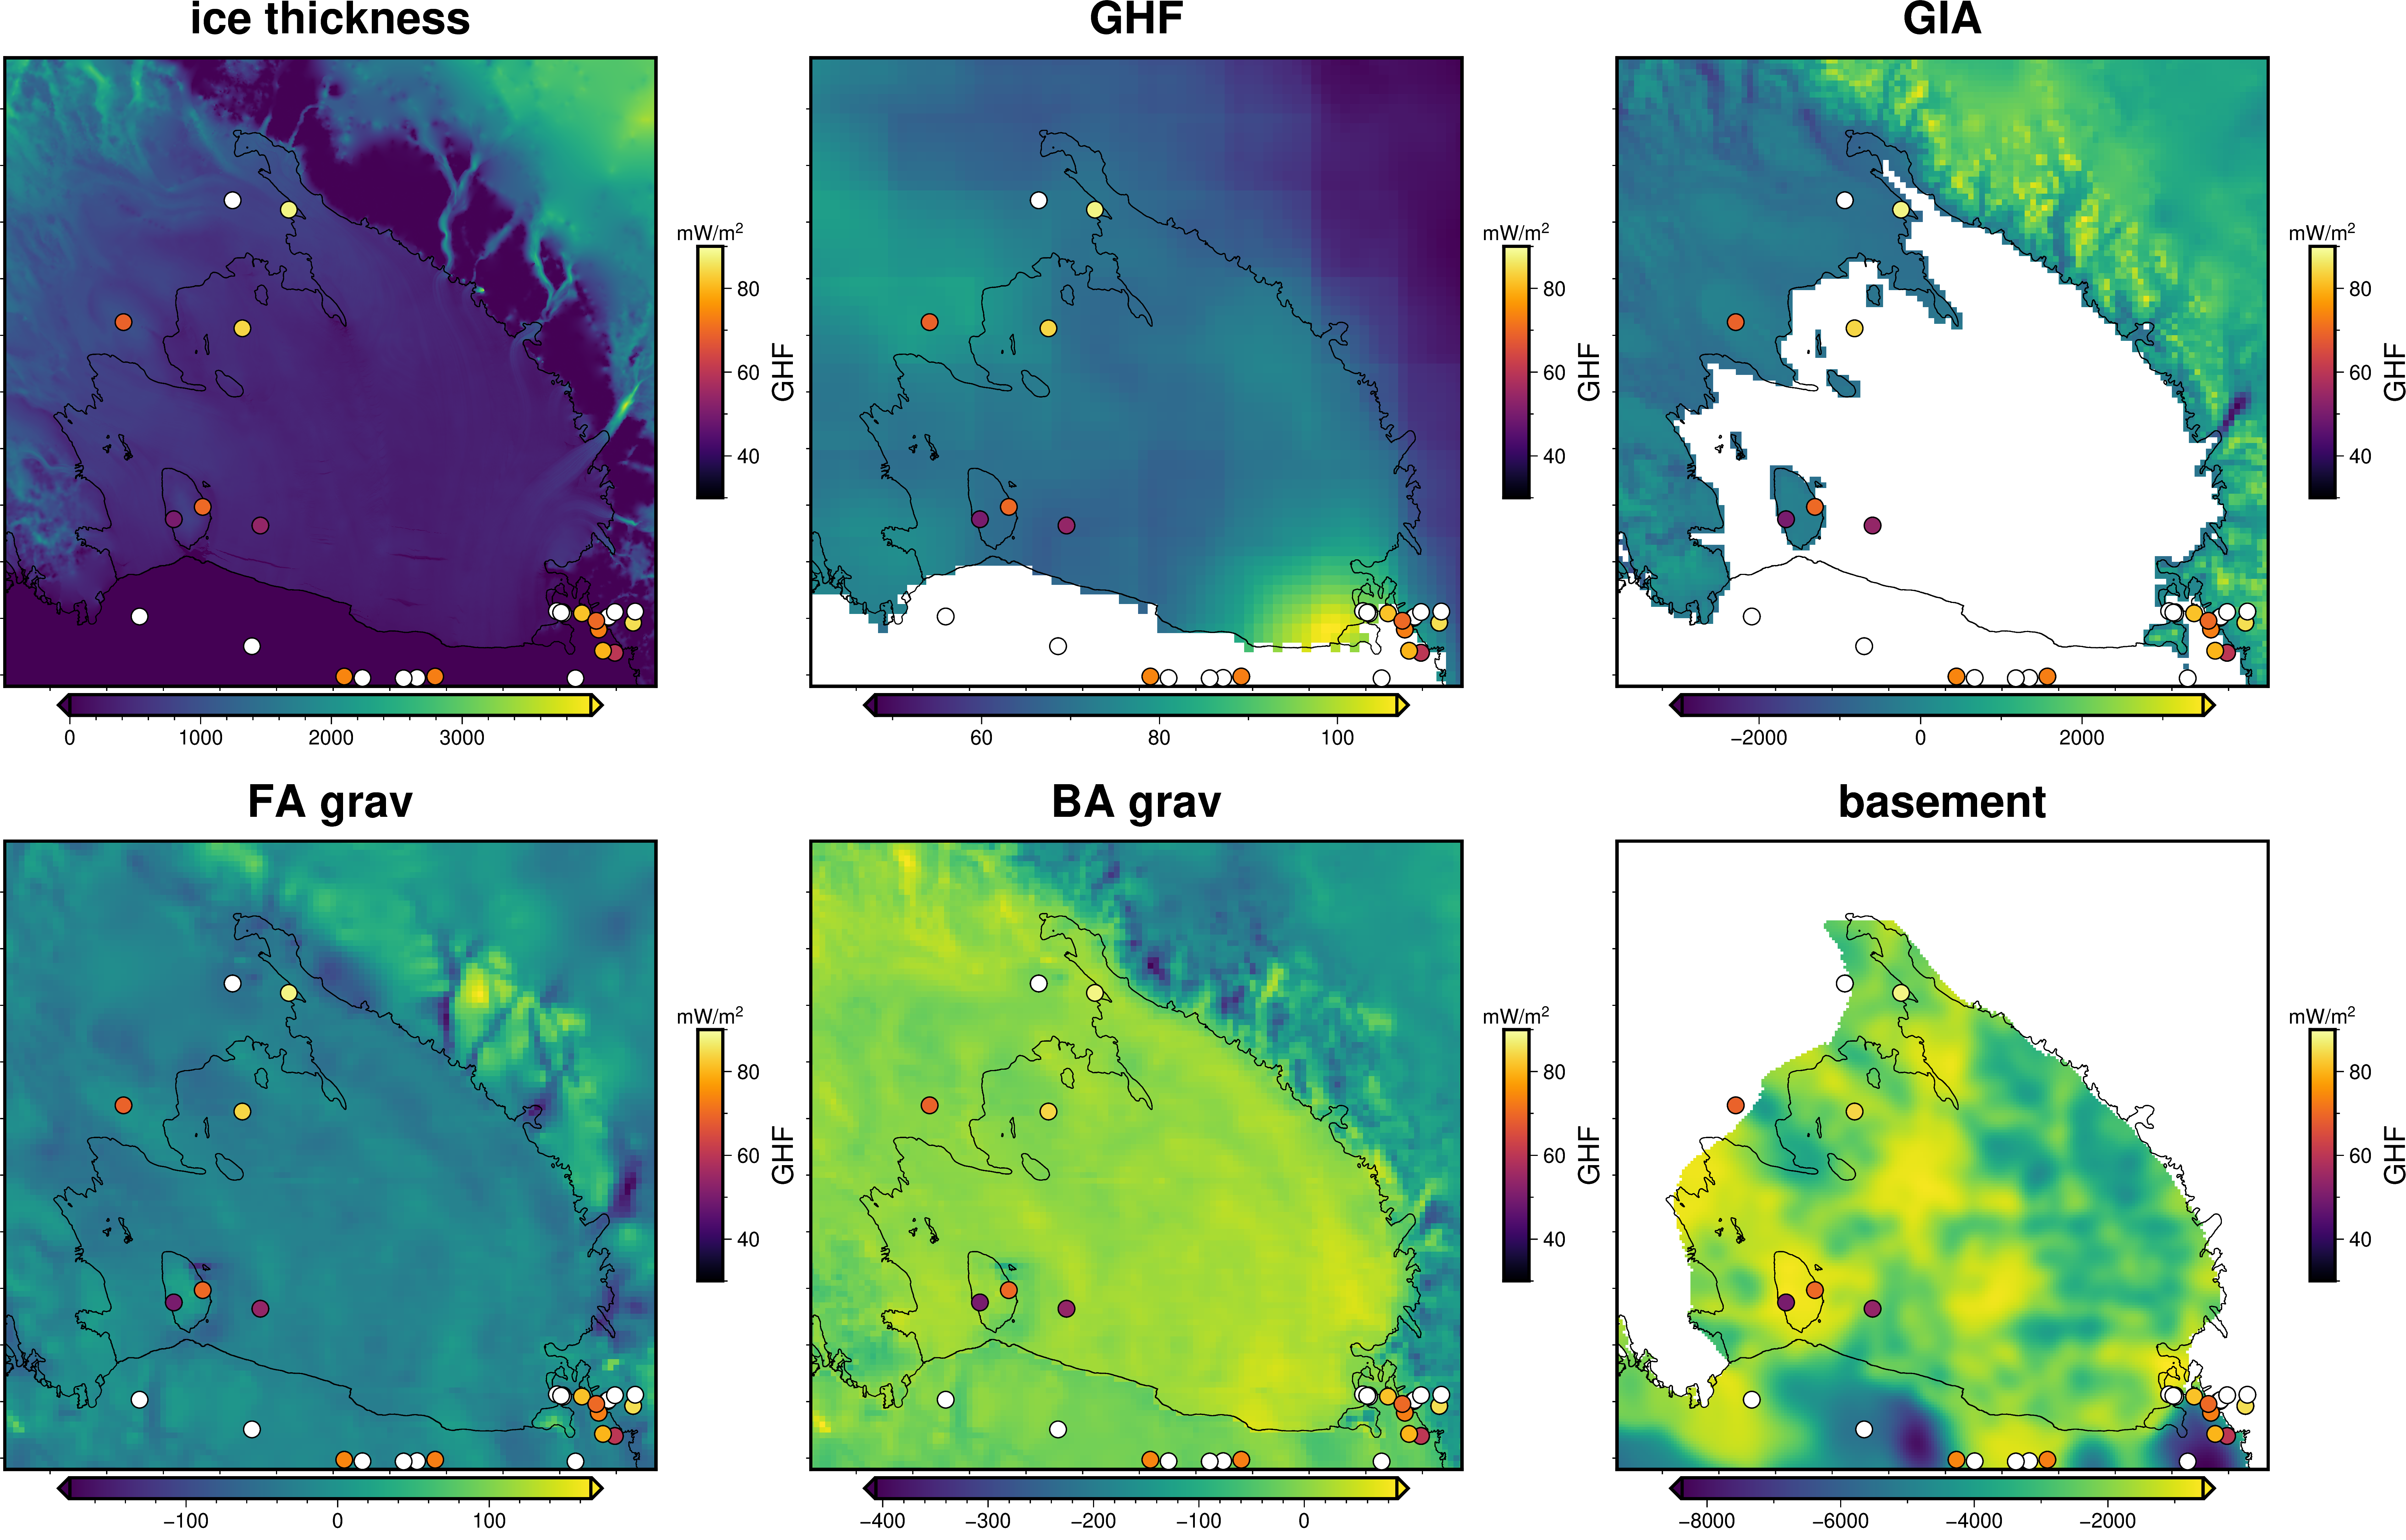

In [21]:
subplot_dimensions = utils.square_subplots(len(layers.items()))

proj, proj_latlon, fig_width, fig_height = utils.set_proj(plot_region, 15)

fig = pygmt.Figure()

# fetch GHF data
df = fetch.ghf(version='burton-johnson-2020', points=True)

with fig.subplot(
    nrows=subplot_dimensions[0], 
    ncols=subplot_dimensions[1],
    subsize=(fig_width, fig_height),
    frame='f',
    margins='1.5c',
    ):
    for i, (k, v) in enumerate(layers.items()):
        with fig.set_panel(panel=i):
            # plot the grids
            maps.plot_grd(
                v['grid'], 
                fig=fig, 
                title=k, 
                origin_shift='no_shift', 
                region=plot_region, 
                coast=True,
                )
            # plot GHF point measurements
            # make a colorscale
            pygmt.makecpt(cmap="inferno", series=[30,90])
            # plot the points
            fig.plot(
                x=df.x,
                y=df.y,
                color=df.GHF,
                cmap=True,
                pen='.8p,black',
                style="c.4c",
            )
            # add a colorbar
            fig.colorbar(position="JMR+o1c/0c+w6c/.6c", frame=["x+lGHF", "y+lmW/m@+2@+"])

# save the figure to use in the Gallery examples
fig.savefig("outputs/subplot_layout.png")

fig.show()

Alternatively, if you create your own layout by using the `origin_shift` parameter of `maps.plot_grid`.

Use kwargs `xshift_amount` and `yshift_amount` to give number of figs to shift origin by. (e.g. `xshift_amount=3` would be 3 figure widths)

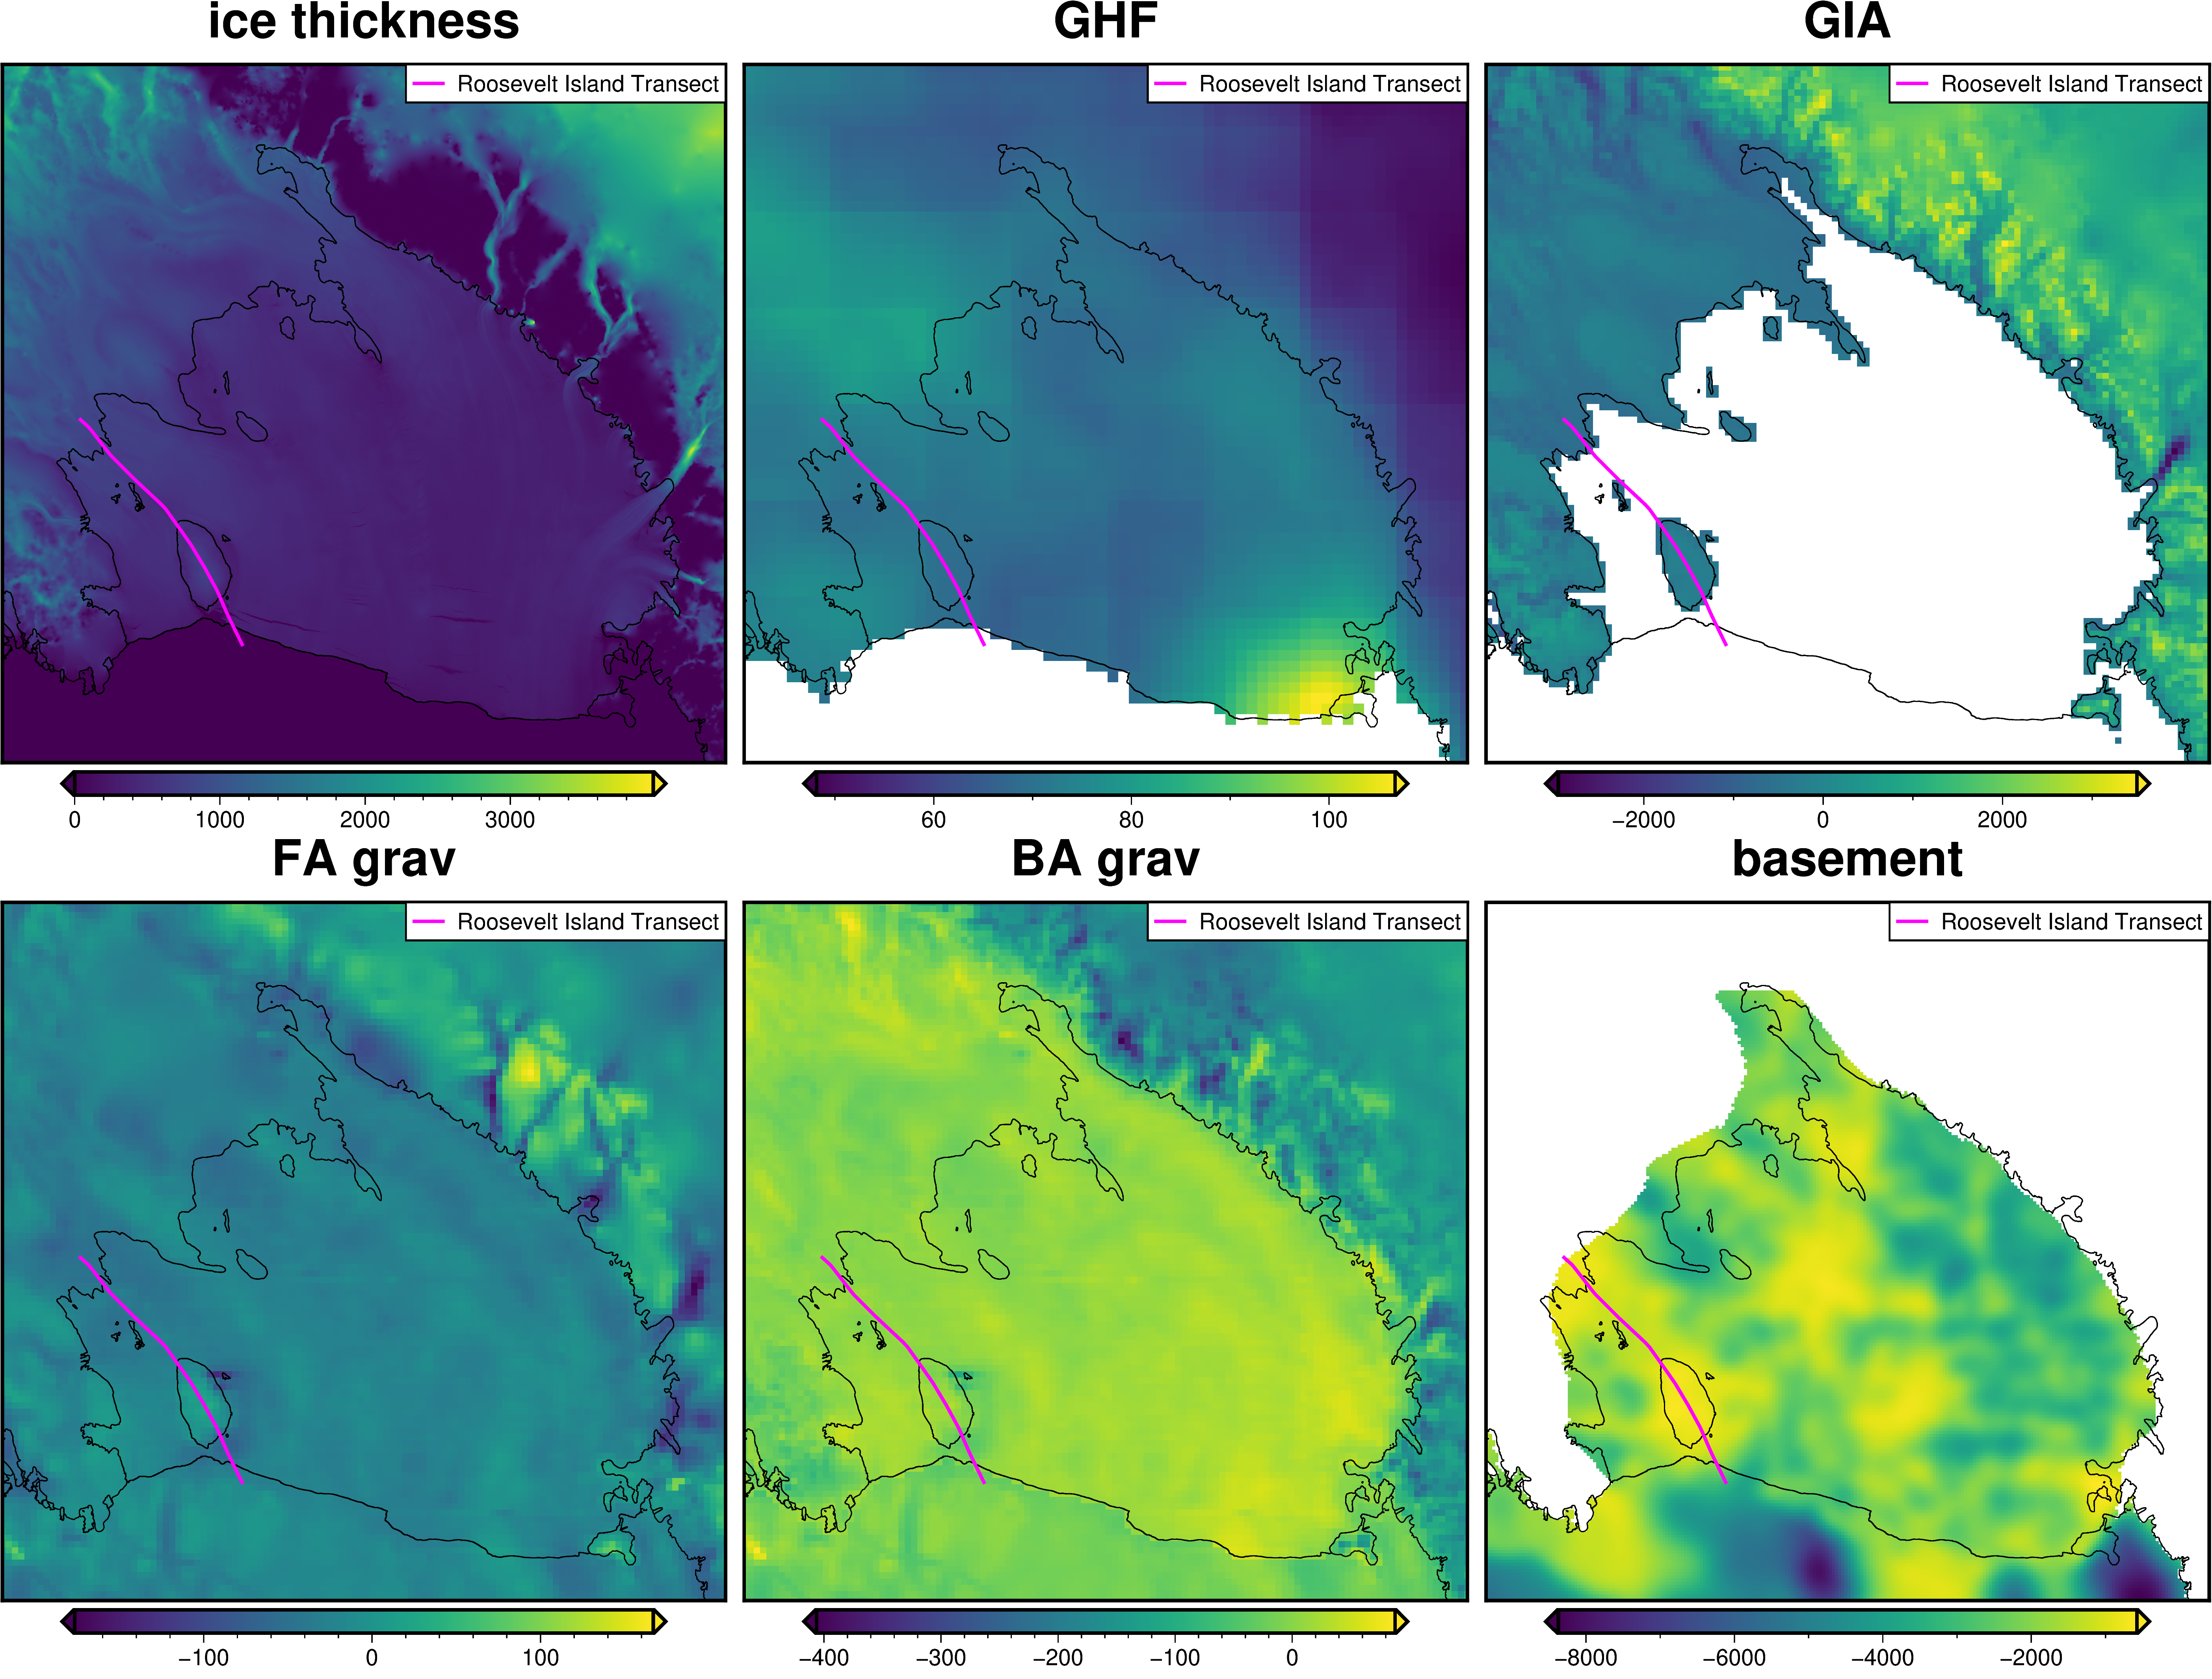

In [22]:
subplot_dimensions = utils.square_subplots(len(layers.items()))

# iterate through the grids in the dictionary
for i, (k, v) in enumerate(layers.items()):
    # for the first grid, need orgin_shift to be default 
    if i == 0:
        fig = maps.plot_grd(
            v['grid'], 
            title=k, 
            region=plot_region, 
            coast=True,
            )
        # plot a shapefile
        fig.plot(
            data=fetch.sample_shp(name='Roosevelt_Island'), 
            pen="2p,magenta", 
            label='Roosevelt Island Transect',
            )
        # add legend
        fig.legend(position='JTR+jTR', box='+gwhite+p1p')
    
    # for the end of each row (mulitples of the number of columns) need to 
    # shift origin down and back to beginning
    elif i % subplot_dimensions[1] == 0:
        fig = maps.plot_grd(
            v['grid'], 
            title=k, 
            fig=fig, 
            origin_shift='both_shift', 
            xshift_amount=-(subplot_dimensions[0]-1), # gives -2, shifts plot back by 2
            yshift_amount=-1, # shift new row down by 1
            region=plot_region, 
            coast=True,
            )
        # plot a shapefile
        fig.plot(
            data=fetch.sample_shp(name='Roosevelt_Island'), 
            pen="2p,magenta", 
            label='Roosevelt Island Transect',
            )
        # add legend
        fig.legend(position='JTR+jTR', box='+gwhite+p1p')

    # for the rest of the grids, just shift to the right like normal
    else:
        fig = maps.plot_grd(
            v['grid'], 
            title=k, 
            fig=fig, 
            origin_shift='xshift', 
            region=plot_region, 
            coast=True,
            )
        # plot a shapefile
        fig.plot(
            data=fetch.sample_shp(name='Roosevelt_Island'), 
            pen="2p,magenta", 
            label='Roosevelt Island Transect',
            )
        # add legend
        fig.legend(position='JTR+jTR', box='+gwhite+p1p')
        
fig.show()